In [14]:
from batch import BatchResult
import pandas as pd
batch_params = {
    "N": [98],
    "province": ["Ontario"],
    "random_seed": range(0,6),
    "n_segregation_steps": [41],
    "price_weight_mode": [0.6],
    "ts_step_length": ["W"],
    "start_year": 2020,
    "refurbishment_rate": 0.03,
    "hp_subsidy": 0.3,
    "fossil_ban_year": 2030
}

res = BatchResult.from_parameters(batch_params, max_steps=120)


results_dir=WindowsPath('c:/src/canadopt/abetam/results/feature_utility_distribution/a1b0b7b9d8596a25c6fa68a775691aab') does not exist. Running model.


100%|██████████| 6/6 [00:26<00:00,  4.50s/it]


In [3]:
res.save()

WindowsPath('c:/src/canadopt/abetam/results/feature_utility_distribution/fc8d0891256db724d145ceb707c0297d')

# Calculation of subsidies

Total amount of subsidies $T^S$

$$
T^S = \sum_y N^p_y * s * P_y 
$$
with 
* Purchase price at year $y$: $P_y$
* subsidy fraction $s$
* amount of purchases in a year $N^p_y$

where $P_y = C_{y,i} * \dot{D}$ 

In [15]:
(res.tech_shares_df.set_index(["RunId","province","year"]).sum(axis=1)*100 - 100.0 > 1e-6).sum()

0

In [16]:
import plotly.express as px
from batch import transform_dict_column
cost_comps = res.results_df[["AgentID","RunId","year",'Cost components','Appliance name']]
cost_comps, new_cols = transform_dict_column(cost_comps, "Cost components")
cost_comps

,AgentID,RunId,year,Appliance name,annuity_cost,fuel_cost,fom_cost
0,0,2,2020.0,Electric furnace,2.928080e+06,1.080415e+08,1.225632e+06
1,1,2,2020.0,Electric furnace,1.374314e+06,5.071000e+07,5.752586e+05
2,2,2,2020.0,Electric furnace,3.073834e+06,1.134196e+08,1.286642e+06
3,3,2,2020.0,Electric furnace,4.787175e+06,1.766392e+08,2.003810e+06
4,4,2,2020.0,Electric furnace,2.386074e+06,8.804234e+07,9.987599e+05
...,...,...,...,...,...,...,...
71143,93,1,2050.0,Heat pump,5.900543e+06,4.931304e+06,1.114807e+06
71144,94,1,2050.0,Electric furnace,1.819230e+06,8.303528e+07,4.101341e+05
71145,95,1,2050.0,Electric furnace,2.262267e+06,1.034388e+08,5.100140e+05
71146,96,1,2050.0,Electric furnace,3.894187e+06,1.772292e+08,8.779201e+05


In [17]:

cost_comps = (cost_comps.groupby(["RunId",'Appliance name'])[new_cols].sum()/4).melt(ignore_index=False)
cost_comps["scenario"] = "test"

px.bar(cost_comps.groupby(["scenario","Appliance name","variable"])["value"].mean().reset_index(), x="scenario", y="value", color="Appliance name", pattern_shape="variable", template="plotly")

In [18]:
from components.technologies import Technologies
px.line(res.tech_shares_df.groupby(["year"])[list(Technologies)].mean(), template="plotly")

c:\Users\dhuck\miniconda3\envs\cando\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dhuck\miniconda3\envs\cando\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dhuck\miniconda3\envs\cando\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\dhuck\miniconda3\envs\cando\lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple

<Axes: xlabel='year', ylabel='Appliance age'>

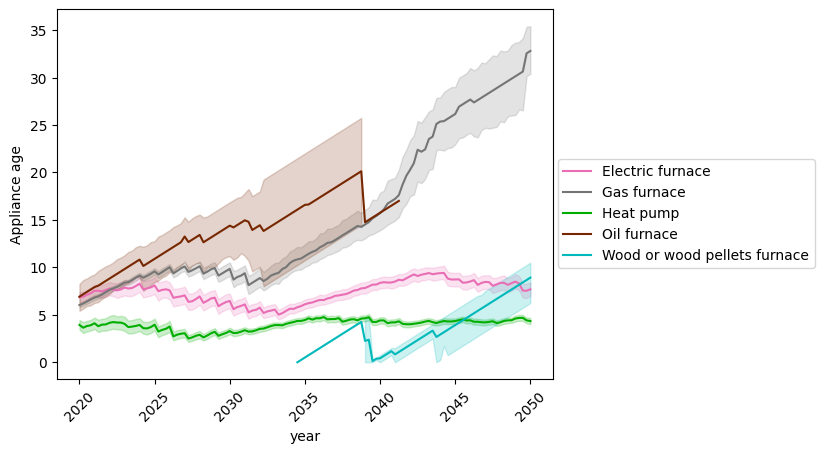

In [8]:
res.appliance_age_fig()

In [13]:
from config import TECHNOLOGY_COLORS
adopt_det_df =res.adoption_details_df.groupby(["year","tech","was_necessary"])["cumulative_amount"].mean().reset_index()
px.line(adopt_det_df, x="year", y="cumulative_amount", color="tech", facet_col="was_necessary", color_discrete_map=TECHNOLOGY_COLORS, template="plotly")

In [2]:
res.results_df.columns
# ['RunId', 'iteration', 'Step', 'N', 'province', 'random_seed',
#        'n_segregation_steps', 'global_util_thresh', 'price_weight_mode',
#        'ts_step_length', 'start_year', 'refurbishment_rate', 'hp_subsidy',
#        'fossil_ban_year', 'Technology shares', 'Energy demand time series',
#        'AgentID', 'Attitudes', 'Adoption details', 'Appliance age',
#        'Appliance name', 'Technology annual_cost', 'Heat pump specific_cost',
#        'Refurbished', 'Required heating size', 'year','Heat demand']

Index(['RunId', 'iteration', 'Step', 'N', 'province', 'random_seed',
       'n_segregation_steps', 'global_util_thresh', 'price_weight_mode',
       'ts_step_length', 'start_year', 'refurbishment_rate', 'hp_subsidy',
       'fossil_ban_year', 'Technology shares', 'Energy demand time series',
       'AgentID', 'Attitudes', 'Adoption details', 'Appliance age',
       'Appliance name', 'Technology annual_cost', 'Heat pump specific_cost',
       'Refurbished', 'Required heating size', 'Heat demand', 'LCOH',
       'Cost components', 'year'],
      dtype='object')

In [5]:
import plotly.express as px
lcohs = pd.DataFrame.from_records(res.results_df["LCOH"])
lcohs[['year','RunId','AgentID',"Refurbished"]] = res.results_df[['year','RunId','AgentID',"Refurbished"]]
long_lcohs = lcohs.set_index(["year","RunId","AgentID","Refurbished"]).melt(ignore_index=False).reset_index().drop("AgentID", axis=1)
long_lcohs = long_lcohs.round(2).drop_duplicates().groupby(["year","variable","Refurbished"]).mean().reset_index()
# long_lcohs
px.line(long_lcohs, x="year", y="value", color="variable",  template="plotly", line_dash="Refurbished")
# px.scatter(adopt_df.reset_index(), x="year", y="LCOH (CAD/kWh)", color="tech", template="plotly")

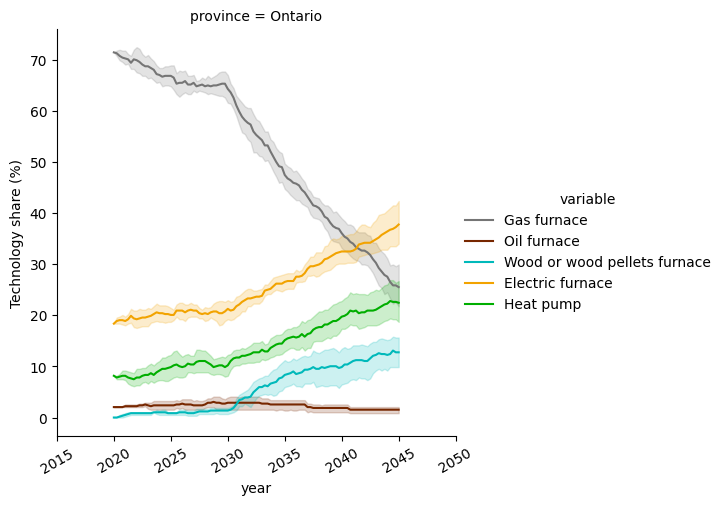

In [6]:
res.tech_shares_fig()

In [7]:
res.adoption_details_fig()

ValueError: Could not interpret value `reason` for `col`. An entry with this name does not appear in `data`.

c:\src\canadopt\abetam\batch.py:664: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


<Axes: xlabel='year', ylabel='Appliance age'>

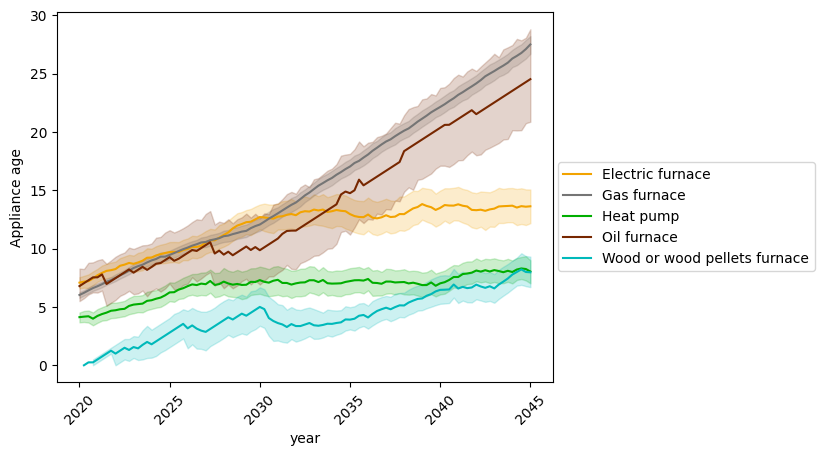

In [ ]:
res.appliance_age_fig()

In [ ]:
# res.adoption_details_df.groupby(["year","tech"])["amount"].sum().reset_index().pivot(columns="tech", index="year").fillna(0).plot()

In [ ]:
if not res.path.exists():
    res.save()

# Calculation of emissions


In [ ]:
res.emissions().head()

,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS
2020,0.454759,1.449743,18.466009,0.000000
2021,0.456322,1.451420,17.941902,0.024764
2022,0.457885,1.453096,17.417794,0.049528
2023,0.459449,1.454773,16.893686,0.074292
2024,0.461012,1.456449,16.369578,0.099056


In [ ]:
import plotly.express as px

fig = px.line(res.emissions().cumsum(), template="plotly")
fig.update_layout(yaxis_title="CO2 Emissions (Mt)", width=500)

In [ ]:
res.results_df["Energy demand time series"]

0        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
1        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
2        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
3        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
4        {'Fuels.NATURAL_GAS': [2769763328.0, 243785190...
                               ...                        
70695    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70696    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70697    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70698    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
70699    {'Fuels.NATURAL_GAS': [1015288704.0, 893622656...
Name: Energy demand time series, Length: 70700, dtype: object